In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import sys; sys.path.append('..')
from tqdm import tqdm
from util.plot import plot_item_rank
%matplotlib inline

In [32]:
import pandas as pd
rating_df = pd.read_csv("../data/movielens/train_rating.csv")

In [33]:
np.random.seed(1234)
#index = rating_df.index.values
#np.random.shuffle(index)
#index = index[:100000]

In [34]:
#rating_df = rating_df.iloc[index]
data = rating_df[["user_id", "movie_id", "rating"]].values

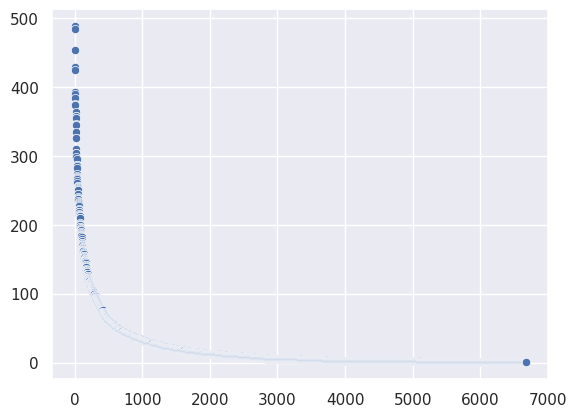

In [35]:
plot_item_rank(rating_df)

In [36]:
num_users = np.unique(data[:,0]).size
num_items = np.unique(data[:,1]).size
print(f'ユーザー数: {num_users}, アイテム数: {num_items}, 評価数: {len(data)}, 密度: {len(data)/(num_users*num_items):.3f}')

ユーザー数: 1000, アイテム数: 6673, 評価数: 127830, 密度: 0.019


In [37]:
user_index = {} 
for index, user_id in enumerate(np.unique(data[:,0])):
    user_index[int(user_id)] = index

item_index = {}
for index, item_id in enumerate(np.unique(data[:,1])):
    item_index[int(item_id)] = index

for index, _data in enumerate(data):
    data[index, 0] = user_index[_data[0]]
    data[index, 1] = item_index[_data[1]]

In [38]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=1234)

In [47]:
from src.MF import MF

model = MF(
    n_users=num_users,
    n_items=num_items,
    n_factors=2000,
    lr=1e-3,
    reg=1e-300,
    n_epochs=30
)

In [48]:
train_loss, test_loss = model.fit(train, test)

100% 30/30 [01:03<00:00,  2.10s/it]


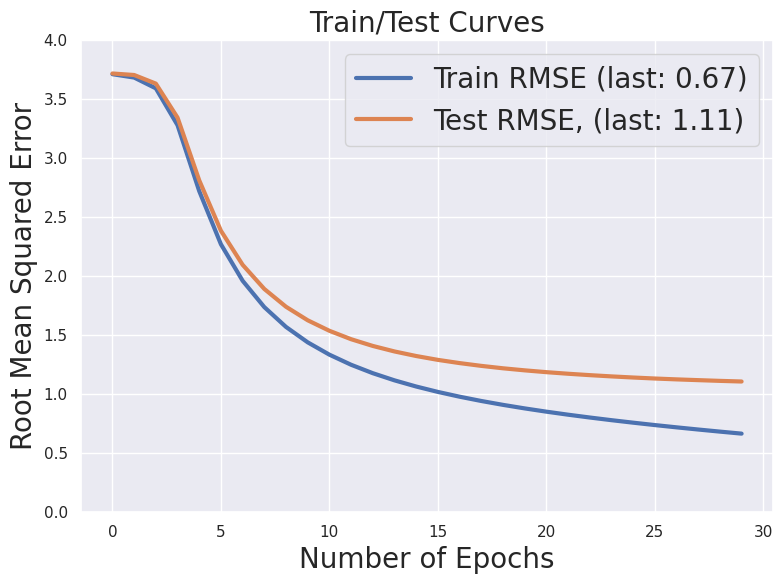

In [49]:
from util.plot import plot_train_curve, plot_heatmap

plot_train_curve(
    train_loss, 
    test_loss,
    ylim_min=0.0,
    ylim_max=4.0
)

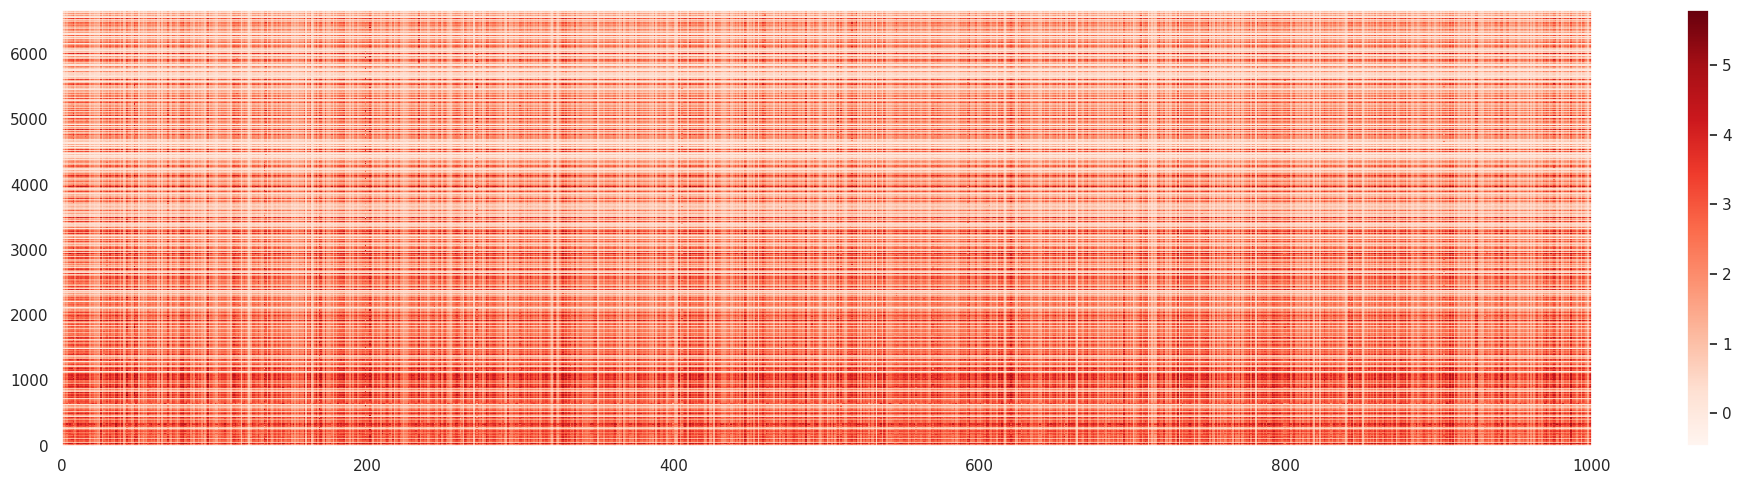

In [50]:
matrix = model.P @ model.Q.T
plot_heatmap(matrix)